<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Train-/-Test-Split" data-toc-modified-id="Train-/-Test-Split-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train / Test Split</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>KNN</a></span><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Régression" data-toc-modified-id="Régression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Régression</a></span></li></ul></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Naive Bayes</a></span><ul class="toc-item"><li><span><a href="#quantitative-data" data-toc-modified-id="quantitative-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>quantitative data</a></span></li><li><span><a href="#qualitative-data" data-toc-modified-id="qualitative-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>qualitative data</a></span></li></ul></li><li><span><a href="#Forêts-Aléatoires" data-toc-modified-id="Forêts-Aléatoires-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Forêts Aléatoires</a></span></li></ul></div>

# Dependencies

In [ ]:
#!pip install numpy==1.22.4
#!pip install matplotlib==3.7.1
#!pip install mglearn==0.2.0
#!pip install pandas==2.0.3
#!pip install scikit-learn==1.3.2
#!pip install seaborn==0.13.1

In [43]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import make_scorer

In [7]:
df=pd.read_csv("airline_satisfaction_final.csv", index_col = 0,
              #nrows = 100
              )

In [8]:
y = df.satisfaction_satisfied.values

X = df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Type of Travel_Business travel',
       'Class_Business', 'Class_Eco Plus',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']]

# Train / Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# KNN

## Classification

In [10]:
split_accuracy = []
split_precision = []
split_recall = []
split_f1 = []
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0


for i in range(1, 11, 1):
    #euclidian_distance
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(X_train, y_train)
    print(f"k={i}")
    prediction = knn.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    precision = precision_score(y_test, prediction)
    print(f"Precision: {accuracy_score(y_test, prediction)}")
    split_precision.append(precision_score(y_test, prediction))
    recall = recall_score(y_test, prediction)
    print(f"Recall: {recall_score(y_test, prediction)}")
    split_recall.append(recall_score(y_test, prediction))
    f1 = f1_score(y_test, prediction)
    print(f"F1: {f1_score(y_test, prediction)}")
    split_f1.append(f1_score(y_test, prediction))
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k_acc = i
        
    if precision > best_precision:
        best_precision = precision
        best_k_pr = i
    
    if recall > best_recall:
        best_recall = recall
        best_k_re = i
        
    if f1 > best_f1:
        best_f1 = f1
        best_k_f1 = i

print(f"Meilleur k avec la meilleure accuracy: k={best_k_acc}, accuracy={best_accuracy} \n Meilleur k avec la meilleur precision: k={best_k_pr}, precision = {best_precision} \n Meilleur k avec le meilleur recall: k={best_k_re}, recall = {best_recall} \n Meilleur k avec le meilleur f1: k={best_k_f1}, f1 = {best_f1}")

k=1
Accuracy: 0.919271635355713
Precision: 0.919271635355713
Recall: 0.8841041998936736
F1: 0.9049108964766699
k=2
Accuracy: 0.91596088697259
Precision: 0.91596088697259
Recall: 0.8307637781321991
F1: 0.8957248626701696
k=3
Accuracy: 0.9273560209424084
Precision: 0.9273560209424084
Recall: 0.8821548821548821
F1: 0.9134363961649618
k=4
Accuracy: 0.9226593778872806
Precision: 0.9226593778872806
Recall: 0.8507885876306929
F1: 0.9052939235374535
k=5
Accuracy: 0.9290883892824146
Precision: 0.9290883892824146
Recall: 0.8810030125819599
F1: 0.9152245949926362
k=6
Accuracy: 0.925277178934401
Precision: 0.925277178934401
Recall: 0.8584086478823321
F1: 0.9089459117136557
k=7
Accuracy: 0.9290498922081922
Precision: 0.9290498922081922
Recall: 0.879230905546695
F1: 0.9150260500714648
k=8
Accuracy: 0.9272020326455189
Precision: 0.9272020326455189
Recall: 0.8646996278575226
F1: 0.9116726610304078
k=9
Accuracy: 0.9288959039113027
Precision: 0.9288959039113027
Recall: 0.8786106680843523
F1: 0.914802343

K-fold validation

In [12]:
knn = KNeighborsClassifier(n_neighbors=best_k_acc,p=2)
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=knn, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_accuracy = np.mean(cross_val_score(estimator=knn, X=X, y=y, scoring="accuracy", cv=kfold))
cross_val_accuracy_std = np.std(cross_val_score(estimator=knn, X=X, y=y, scoring="accuracy", cv=kfold))
print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_std}")
print(f"Standard error on fold: {cross_val_accuracy_std}")

K-fold validation score [0.93655682 0.92931937 0.92931937 0.93193717 0.92931937 0.92546966
 0.92793348 0.9316292  0.93701879 0.93224515 0.93393902 0.92854943
 0.92731752 0.93085925 0.93147521 0.92331383 0.93101324 0.9316292
 0.92947336 0.93671081]
Average k-fold validation score : 0.9307514628888207
Average error on fold: 0.0029198857082782894
Standard error on fold: 0.0029198857082782894


In [13]:
knn = KNeighborsClassifier(n_neighbors=best_k_pr)
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=knn, X=X, y=y, scoring="precision", cv=kfold)
cross_val_precision = np.mean(scores)
cross_val_precision_std = np.std(scores)
print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_std}")
print(f"Standard error on fold: {cross_val_accuracy_std}")

K-fold validation score [0.97488862 0.96681688 0.97086149 0.97843552 0.97191953 0.96887967
 0.96697921 0.97412731 0.96654427 0.96917386 0.97058824 0.97405272
 0.97092547 0.96876302 0.96968472 0.97399431 0.97055111 0.96586345
 0.97174907 0.97054076]
Average k-fold validation score : 0.9707669605708272
Average error on fold: 0.0029198857082782894
Standard error on fold: 0.0029198857082782894


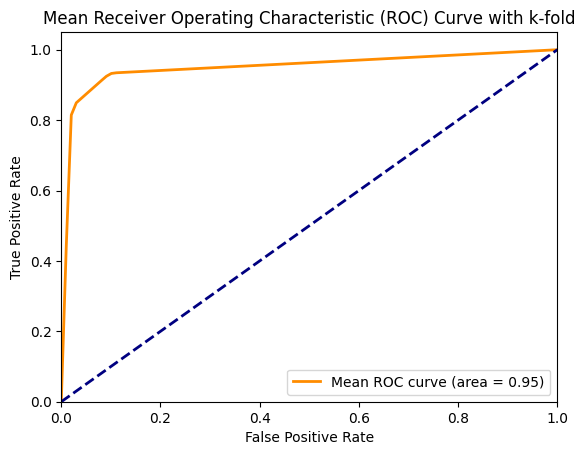

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Créer le modèle KNN avec le nombre de voisins optimal
knn = KNeighborsClassifier(n_neighbors=best_k_pr)

# Initialiser la validation croisée k-fold
kfold = KFold(n_splits=20, shuffle=True)

# Initialiser les listes pour stocker les résultats de la validation croisée
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

# Effectuer la validation croisée k-fold
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Entraîner le modèle sur l'ensemble d'entraînement du pli actuel
    knn.fit(X_train_fold, y_train_fold)
    
    # Obtenir les probabilités de prédiction pour la classe positive sur l'ensemble de test du pli actuel
    proba_matrix_fold = knn.predict_proba(X_test_fold)
    fpr, tpr, thresholds = roc_curve(y_test_fold, proba_matrix_fold[:, 1])
    
    # Interpoler les taux de vrais positifs sur un ensemble de faux positifs uniformément répartis
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    
# Calculer la moyenne des taux de vrais positifs sur tous les plis
mean_tpr /= kfold.get_n_splits()

# Calculer l'aire sous la courbe ROC
roc_auc = auc(mean_fpr, mean_tpr)

# Tracer la courbe ROC moyenne
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve with k-fold')
plt.legend(loc="lower right")
plt.show()

## Régression

# Naive Bayes

In [14]:
y = df.satisfaction_satisfied.values

categorical_variables = ['Gender_Male','Customer Type_Loyal Customer','Type of Travel_Business travel',
                         'Class_Business', 'Class_Eco Plus','Inflight wifi service', 'Departure/Arrival time convenient',
                         'Ease of Online booking', 'Gate location', 'Food and drink','Online boarding', 'Seat comfort', 
                         'Inflight entertainment','On-board service', 'Leg room service', 'Baggage handling','Checkin service', 
                         'Inflight service', 'Cleanliness']

quantitative_variables = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

X = df[categorical_variables + quantitative_variables].values

X_quantitative = df[quantitative_variables].fillna(df[quantitative_variables].mean()).values

X_categorical = df[categorical_variables].values

## quantitative data

In [15]:
gaussian_nb = GaussianNB()

print("======= Training")
gaussian_nb.fit(X_quantitative, y)

print("======= Prediction")
predictions = gaussian_nb.predict(X_quantitative)

print("======= Results")
print(classification_report(y, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

         0.0       0.66      0.86      0.75     73452
         1.0       0.70      0.43      0.53     56428

    accuracy                           0.67    129880
   macro avg       0.68      0.64      0.64    129880
weighted avg       0.68      0.67      0.65    129880



In [16]:
predictions = gaussian_nb.predict_proba(X_quantitative)

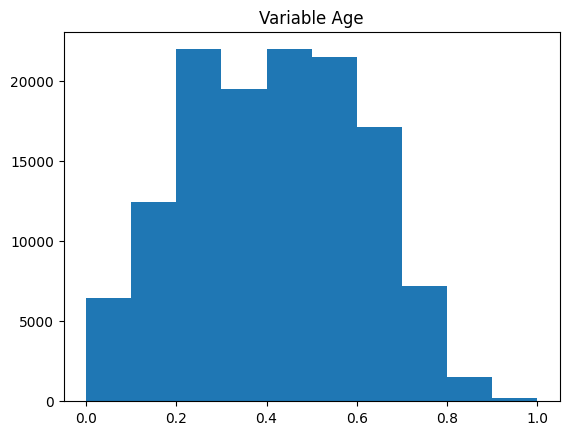

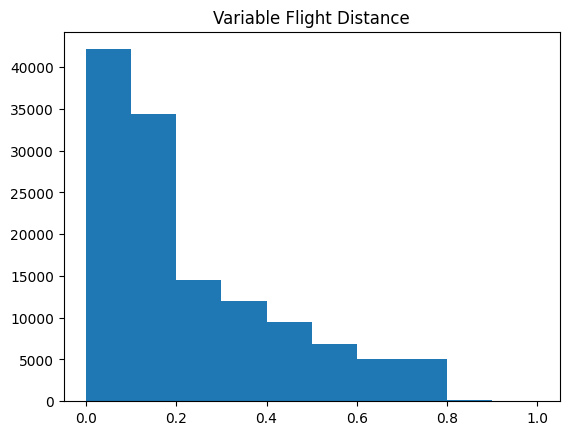

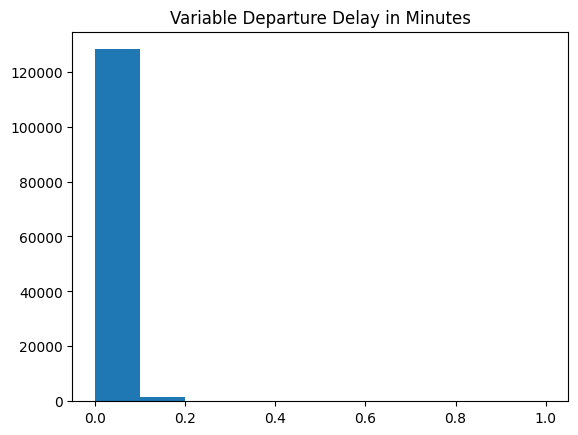

In [17]:
for ix, var in enumerate(X_quantitative.T):
    plt.hist(var)
    plt.title(f"Variable {quantitative_variables[ix]}")
    plt.show()

In [18]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_quantitative,y)
predictions = gaussian_nb.predict(X_quantitative)

<Axes: >

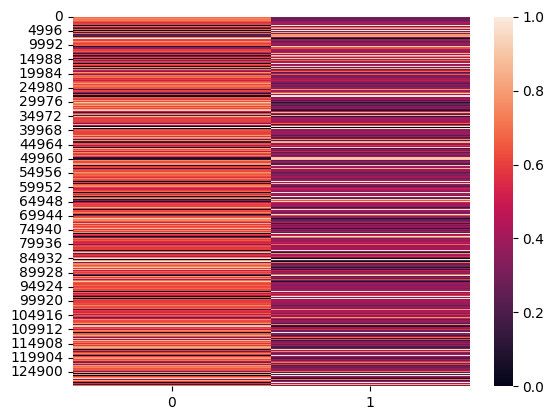

In [19]:
predicted_proba = gaussian_nb.predict_proba(X_quantitative)
sns.heatmap(predicted_proba)

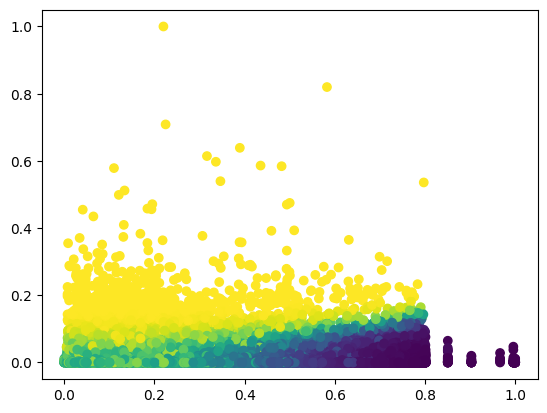

In [20]:
predicted_proba = gaussian_nb.predict_proba(X_quantitative)
plt.scatter(X_quantitative[:,1], X_quantitative[:,2],c=predicted_proba[:,0])
plt.savefig(f'/home/estelle/robotlearn/airline_satisfaction/figures/nuage_points.png')
plt.show()

In [21]:
gaussian_nb = GaussianNB()

print(f"== Working with accuracy")

scores = cross_val_score(estimator=gaussian_nb, X=X_quantitative, y=y)
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Median accuracy: {np.median(scores)}")

print(f"== Working with precision")

scores = cross_val_score(estimator=gaussian_nb, X=X_quantitative, y=y, scoring="precision")

print(f"Mean precision: {np.mean(scores)}")
print(f"Median precision: {np.median(scores)}")

print(f"== Working with recall")

scores = cross_val_score(estimator=gaussian_nb, X=X_quantitative, y=y, scoring="recall")

print(f"Mean recall: {np.mean(scores)}")
print(f"Median recall: {np.median(scores)}")

== Working with accuracy
Mean accuracy: 0.6716430551278103
Median accuracy: 0.6716584539574992
== Working with precision
Mean precision: 0.6993941997414974
Median precision: 0.69830007390983
== Working with recall
Mean recall: 0.42831556004981375
Median recall: 0.4289385078858763


## qualitative data

In [22]:
gaussian_nb = CategoricalNB()
gaussian_nb.fit(X_categorical,y)
predictions = gaussian_nb.predict(X_categorical)

In [26]:
gaussian_nb_categorical = CategoricalNB()

print("======= Training")
gaussian_nb_categorical.fit(X_categorical, y)

print("======= Prediction")
predictions = gaussian_nb_categorical.predict(X_categorical)

print("======= Results")
print(classification_report(y, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85     73452
         1.0       0.85      0.72      0.78     56428

    accuracy                           0.82    129880
   macro avg       0.83      0.81      0.82    129880
weighted avg       0.83      0.82      0.82    129880



In [27]:
print(f"== Working with accuracy")

scores = cross_val_score(estimator=gaussian_nb, X=X_categorical, y=y)
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Median accuracy: {np.median(scores)}")

print(f"== Working with precision")

scores = cross_val_score(estimator=gaussian_nb, X=X_categorical, y=y, scoring="precision")

print(f"Mean precision: {np.mean(scores)}")
print(f"Median precision: {np.median(scores)}")

print(f"== Working with recall")

scores = cross_val_score(estimator=gaussian_nb, X=X_categorical, y=y, scoring="recall")

print(f"Mean recall: {np.mean(scores)}")
print(f"Median recall: {np.median(scores)}")

== Working with accuracy
Mean accuracy: 0.822305204804435
Median accuracy: 0.8213735756082537
== Working with precision
Mean precision: 0.8450408325539108
Median precision: 0.8472693613082382
== Working with recall
Mean recall: 0.7237362234773796
Median recall: 0.7254120148856991


In [30]:
# Transform quantitative variable into qualitative ones

kbins_discretizer = KBinsDiscretizer(strategy = 'kmeans')
discrete_vars = kbins_discretizer.fit_transform(X_quantitative).todense()

# Apply categorical NB to all of them
X_quanti_discrete = np.hstack([discrete_vars, X_categorical])

gaussian_nb = CategoricalNB()

scores = cross_val_score(estimator=gaussian_nb, X=X_quantitative, y=y)
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Median accuracy: {np.median(scores)}")

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Mean accuracy: nan
Median accuracy: nan


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 102, in predict
    jll = self._joint_log_likelihood(X)
  File "/home/estelle

In [40]:
gaussian_nb_quanta = GaussianNB()
gaussian_nb_quanta.fit(X_quantitative, y)
gaussian_nb_categorical = CategoricalNB()
gaussian_nb_categorical.fit(X_categorical, y)

gaussian_full = GaussianNB()
proba_matrix = np.concatenate([gaussian_nb_quanta.predict_proba(X_quantitative)[:,0].reshape(-1,1), gaussian_nb_categorical.predict_proba(X_categorical)[:,0].reshape(-1, 1)], axis=1)
gaussian_full.fit(proba_matrix, y)

print(f"===== Accuracy using full dataset \n {gaussian_full.score(proba_matrix, y)}")

y_pred = gaussian_full.predict(proba_matrix)
precision = precision_score(y, y_pred)

print(f"===== Precision using full dataset \n {precision}")


===== Accuracy using full dataset 
 0.8247998152140438
===== Precision using full dataset 
 0.8155798391782721


In [44]:
kfold = KFold(n_splits=20, shuffle=True)
precision_scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=y, cv=kfold, scoring="precision")

print("Precision scores for each fold:")
print(precision_scores)

mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
print("Mean precision:", mean_precision)
print("Standard deviation of precision:", std_precision)

Precision scores for each fold:
[0.81134969 0.81118345 0.81791375 0.82363908 0.81101471 0.81481481
 0.81722452 0.8121547  0.80872483 0.81866065 0.82648057 0.80335196
 0.82621951 0.82178585 0.81724392 0.80762116 0.8166731  0.80410023
 0.81768158 0.82297904]
Mean precision: 0.8155408558596987
Standard deviation of precision: 0.0066266558532211165


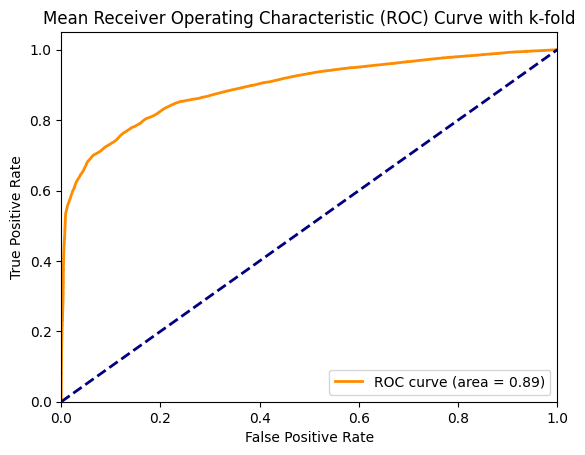

In [66]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prédire les probabilités de classe positive pour chaque exemple avec la validation croisée k-fold
y_probas = cross_val_predict(gaussian_full, proba_matrix, y, cv=kfold, method="predict_proba")

# Calculer les taux de faux positifs et de vrais positifs pour chaque pli
fpr, tpr, thresholds = roc_curve(y, y_probas[:, 1])

# Calculer l'aire sous la courbe ROC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC moyenne
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve with k-fold')
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''gaussian_nb_quanta = GaussianNB()
gaussian_nb_quanta.fit(X_quantitative, y)

quantitative_probabilities = gaussian_nb_quanta.predict_proba(X_quantitative)

gaussian_nb_categorical = CategoricalNB()
gaussian_nb_categorical.fit(X_cat, y)

qualitative_probabilities = gaussian_nb_categorical.predict_proba(X_categorical)

combined_probabilities = np.concatenate((quantitative_probabilities, qualitative_probabilities), axis=1)

gaussian_nb_combined = GaussianNB()
gaussian_nb_combined.fit(combined_probabilities, y)

print("===== Accuracy using full dataset")
gaussian_nb_combined.score(combined_probabilities, y)'''

# Forêts Aléatoires

In [72]:
#n_estimators -> plus la valeur est elevee plus robuste, moins de surapprentissage
n_estimators = 100

In [73]:
forest = RandomForestClassifier(n_estimators=n_estimators,random_state=1)

In [60]:
forest.fit(X_train, y_train)
forest.predict(X_test)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.964


In [76]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=forest, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_accuracy = np.mean(cross_val_score(estimator=forest, X=X, y=y, scoring="accuracy", cv=kfold))
cross_val_accuracy_std = np.std(cross_val_score(estimator=forest, X=X, y=y, scoring="accuracy", cv=kfold))
print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_std}")
print(f"Standard error on fold: {cross_val_accuracy_std}")

K-fold validation score [0.96134894 0.9644287  0.96535263 0.96273483 0.96550662 0.96027102
 0.96427472 0.95965507 0.96612257 0.96196489 0.96335079 0.96427472
 0.9644287  0.96612257 0.96766246 0.96412073 0.96304281 0.96227287
 0.9658146  0.9618109 ]
Average k-fold validation score : 0.9637280566676931
Average error on fold: 0.002243306138876943
Standard error on fold: 0.002243306138876943


In [77]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=forest, X=X, y=y, scoring="precision", cv=kfold)
cross_val_precision = np.mean(cross_val_score(estimator=forest, X=X, y=y, scoring="precision", cv=kfold))
cross_val_precision_std = np.std(cross_val_score(estimator=forest, X=X, y=y, scoring="precision", cv=kfold))
print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_std}")
print(f"Standard error on fold: {cross_val_accuracy_std}")

K-fold validation score [0.97309252 0.97725632 0.97337278 0.97528172 0.97909024 0.97604576
 0.97941176 0.97697735 0.97820465 0.96630824 0.97164948 0.97560976
 0.97780165 0.97292353 0.97352496 0.97232472 0.97849868 0.97183099
 0.96711013 0.9724338 ]
Average k-fold validation score : 0.9744374522803676
Average error on fold: 0.002243306138876943
Standard error on fold: 0.002243306138876943


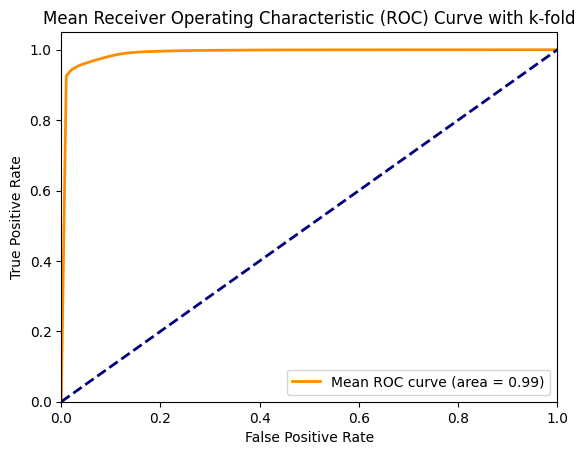

In [74]:
# Créer le modèle KNN avec le nombre de voisins optimal
forest = RandomForestClassifier(n_estimators=n_estimators,random_state=1)

# Initialiser la validation croisée k-fold
kfold = KFold(n_splits=20, shuffle=True)

# Initialiser les listes pour stocker les résultats de la validation croisée
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

# Effectuer la validation croisée k-fold
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Entraîner le modèle sur l'ensemble d'entraînement du pli actuel
    forest.fit(X_train_fold, y_train_fold)
    
    # Obtenir les probabilités de prédiction pour la classe positive sur l'ensemble de test du pli actuel
    proba_matrix_fold = forest.predict_proba(X_test_fold)
    fpr, tpr, thresholds = roc_curve(y_test_fold, proba_matrix_fold[:, 1])
    
    # Interpoler les taux de vrais positifs sur un ensemble de faux positifs uniformément répartis
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    
# Calculer la moyenne des taux de vrais positifs sur tous les plis
mean_tpr /= kfold.get_n_splits()

# Calculer l'aire sous la courbe ROC
roc_auc = auc(mean_fpr, mean_tpr)

# Tracer la courbe ROC moyenne
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve with k-fold')
plt.legend(loc="lower right")
plt.show()

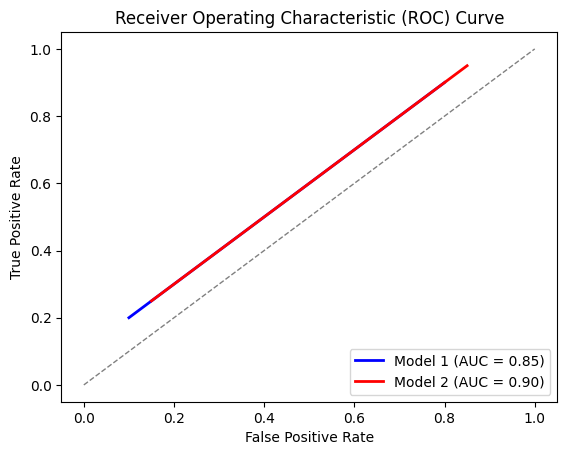

In [75]:
import matplotlib.pyplot as plt

# Supposons que vous avez déjà calculé les FPR, TPR et AUC-ROC pour chaque modèle que vous souhaitez superposer
fpr_model1, tpr_model1, auc_model1 = [0.1, 0.2, 0.4, 0.6, 0.8], [0.2, 0.3, 0.5, 0.7, 0.9], 0.85
fpr_model2, tpr_model2, auc_model2 = [0.15, 0.25, 0.45, 0.65, 0.85], [0.25, 0.35, 0.55, 0.75, 0.95], 0.90

# Tracer la première courbe ROC
plt.plot(fpr_model1, tpr_model1, color='blue', lw=2, label='Model 1 (AUC = %0.2f)' % auc_model1)

# Tracer la deuxième courbe ROC et superposer sur le même graphique
plt.plot(fpr_model2, tpr_model2, color='red', lw=2, label='Model 2 (AUC = %0.2f)' % auc_model2)

# Tracer la ligne en pointillés représentant la ligne de référence aléatoire
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Définir les étiquettes des axes et le titre du graphique
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()